# Question 1 - When is the best time of day, day of the week, and time of year to fly to minimise delays?

## Importing Packages

In [1]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Datasets

In [2]:
# Importing the cleaned dataset
cleaned_df = pd.read_csv("Files/Cleaned_Dataset.csv")

In [3]:
# Changing the setting to show all columns and showing first and last 5 rows
pd.set_option("display.max_columns", None)
cleaned_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268890,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,0,0,0,0,0,0
14268891,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,0,0,0,0,0,0
14268892,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,0,0,0,15,0,0
14268893,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,0,0,0,0,0,36


In [4]:
# Checking for any null values
cleaned_df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

## Best time of the year to fly to minimize delays

In [5]:
# Creating a new variable to hold the average delay grouped by month
mean_ArrDelay_month = cleaned_df[["Month","ArrDelay"]].groupby(["Month"]).mean()

In [6]:
mean_ArrDelay_month

,ArrDelay
Month,
1,7.416097
2,10.473841
3,9.004440
4,7.464281
5,6.940931
6,14.090157
7,12.685577
8,10.587973
9,5.983817


In [7]:
# Resetting the index so that "month" won't be considered the index
mean_ArrDelay_month = mean_ArrDelay_month.reset_index()
mean_ArrDelay_month

,Month,ArrDelay
0,1,7.416097
1,2,10.473841
2,3,9.004440
3,4,7.464281
4,5,6.940931
5,6,14.090157
6,7,12.685577
7,8,10.587973
8,9,5.983817
9,10,8.523575


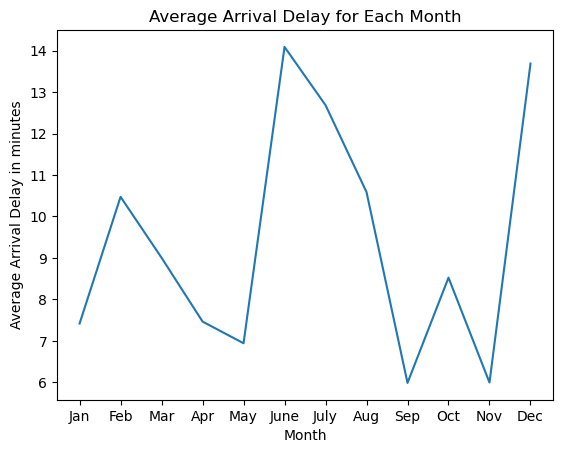

In [16]:
# Plotting a line plot with to show how average arrival delay varies with month
sns.lineplot(data = mean_ArrDelay_month, 
             x = "Month", 
             y = "ArrDelay").set(title = "Average Arrival Delay for Each Month", 
                                xlabel = "Month", 
                                ylabel = "Average Arrival Delay in minutes")

# Changing the months to labels instead of numbers
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", 
                                                    "Aug","Sep","Oct","Nov","Dec"])
# Saving the plot locally as a png
plt.savefig("Average Delay for Each Month.png")

## Best day of the week to fly to minimize delays

In [17]:
# Creating a new varisble to hold the average delay grouped by day
mean_ArrDelay_day = cleaned_df[["DayOfWeek","ArrDelay"]].groupby(["DayOfWeek"]).mean()

In [18]:
# Resetting the index so that "DayofWeek" won't be considered the index
mean_ArrDelay_day = mean_ArrDelay_day.reset_index()
mean_ArrDelay_day

,DayOfWeek,ArrDelay
0,1,9.661379
1,2,7.221367
2,3,8.953476
3,4,12.094731
4,5,12.660901
5,6,5.495174
6,7,9.201350


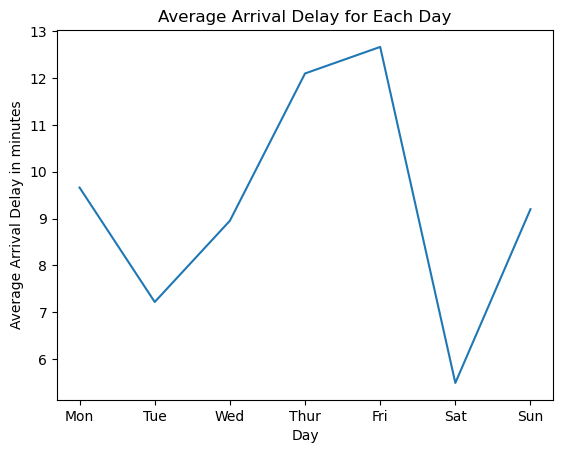

In [19]:
# Plotting a line plot with to show how average arrival delay varies with month
sns.lineplot(data = mean_ArrDelay_day, 
             x = "DayOfWeek", 
             y = "ArrDelay").set(title = "Average Arrival Delay for Each Day", 
                                xlabel = "Day", 
                                ylabel = "Average Arrival Delay in minutes")

# Changing the months to labels instead of numbers
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"])
# Saving the plot locally as a png
plt.savefig("Average Delay for Each Day.png")

## Best time of day to fly to minimize delays

##### For this part "CRSDepTime" is used since anyone planning on flying can only plan using the scheduled departure time

In [4]:
# Creating new column and binning the scheduled deparure times into time groups
cleaned_df["TimeBins"] = cleaned_df["CRSDepTime"].apply(lambda x:
                                                      "0000 - 0400" if x < 0400.0 else(
                                                      "0400 - 0800" if x >= 0400.0 and x < 0800.0 else(
                                                      "0800 - 1200" if x >= 0800.0 and x < 1200.0 else(
                                                      "1200 - 1600" if x >= 1200.0 and x < 1600.0 else(
                                                      "1600 - 2000" if x >= 1600.0 and x < 2000.0 else(
                                                      "2000 - 2400" if x >= 2000.0 and x < 2400.0 else
                                                      "invalid"))))))

In [21]:
# Creating a new variable to hold the average delay grouped by time
mean_ArrDelay_time = cleaned_df[["TimeBins","ArrDelay"]].groupby(["TimeBins"]).mean()

In [22]:
# Resetting the index so that "TimeBins" won't be considered the index
mean_ArrDelay_time = mean_ArrDelay_time.reset_index()
mean_ArrDelay_time

,TimeBins,ArrDelay
0,0000 - 0400,3.601990
1,0400 - 0800,1.270691
2,0800 - 1200,4.861556
3,1200 - 1600,10.674765
4,1600 - 2000,15.999764
5,2000 - 2400,14.227115


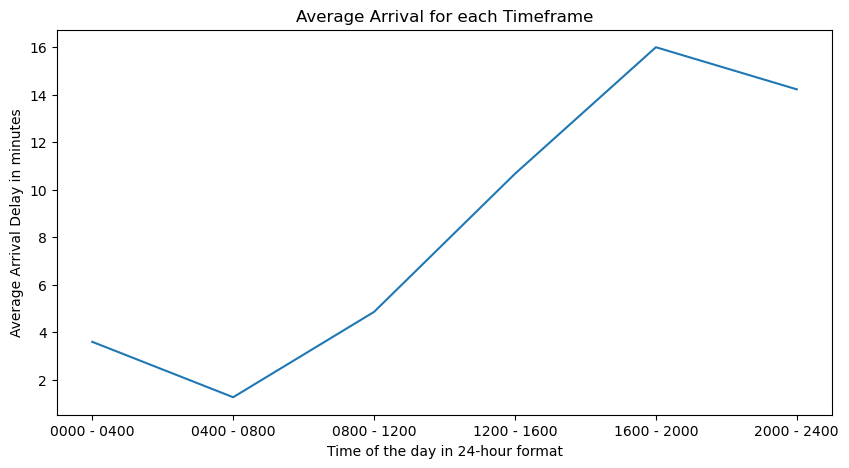

In [23]:
# Plotting a line plot with to show how average arrival delay varies with time
plt.figure(figsize=(10,5))
sns.lineplot(data = mean_ArrDelay_time, 
             x = "TimeBins", 
             y = "ArrDelay").set(title = "Average Arrival Delay for each Timeframe", 
                                xlabel = "Time of the day in 24-hour format", 
                                ylabel = "Average Arrival Delay in minutes")

# Saving the plot locally as a png
plt.savefig("Average Delay for Time.png")